# Libras Movement Data Set

https://archive.ics.uci.edu/ml/datasets/Libras+Movement

## Data Set Information:

The dataset (movement_libras) contains 15 classes of 24 instances each, where each class references to a hand movement type in LIBRAS. 

In the video pre-processing, a time normalization is carried out selecting 45 frames from each video, in according 
to an uniform distribution. In each frame, the centroid pixels of the segmented objects (the hand) are found, which 
compose the discrete version of the curve F with 45 points. All curves are normalized in the unitary space. 

In order to prepare these movements to be analysed by algorithms, we have carried out a mapping operation, that is, each 
curve F is mapped in a representation with 90 features, with representing the coordinates of movement. 

Some sub-datasets are offered in order to support comparisons of results. 

In [1]:
%load_ext rpy2.ipython

import rpy2
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

In [2]:
%%R

# Install necessary packages

# install.packages("MASS")
# install.packages("kernlab")
# install.packages("lattica")
# install.packages("class")
# install.packages("ggplot2")

NULL


/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


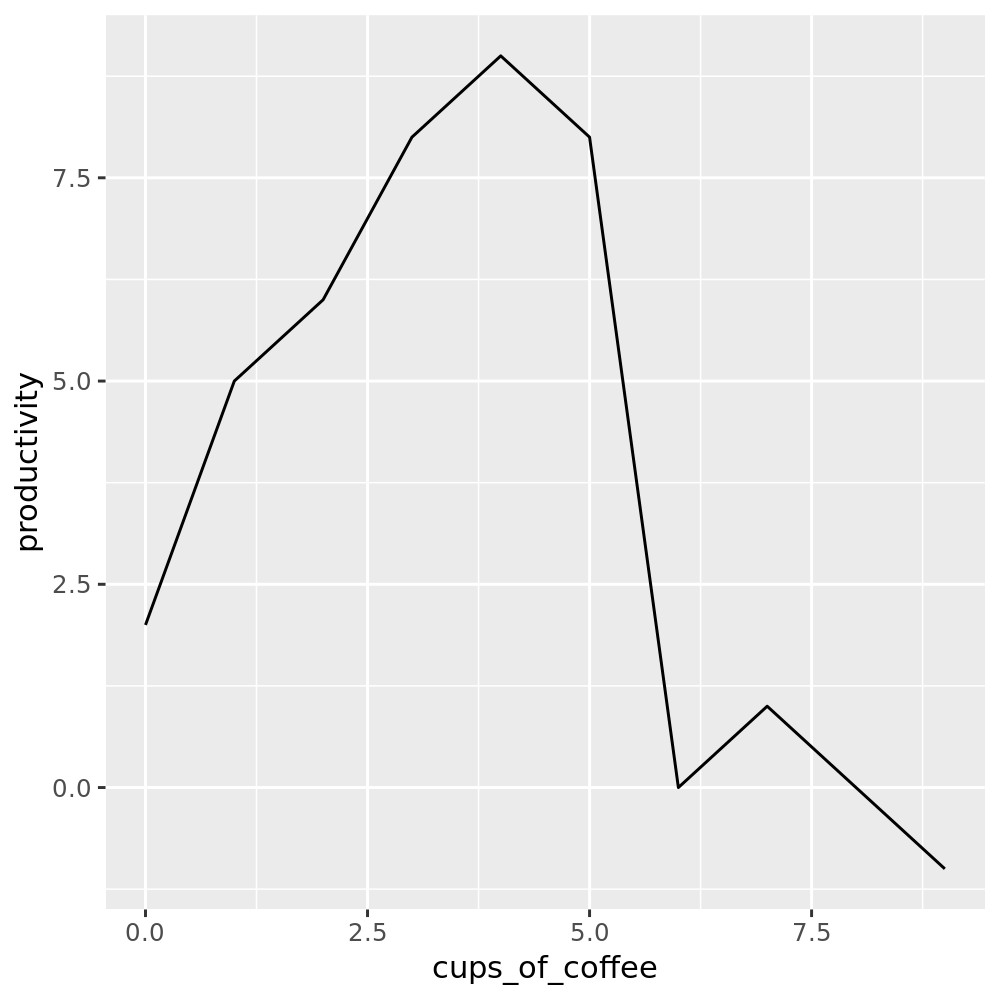

In [3]:
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

In [4]:
%%R

library(lattice)
library(class)
library(kernlab)
library(MASS)

raw.data <- read.csv("movement_libras.data",header=FALSE)
classes.dim <- 10
pca.dim <- 10
clusters.num <- 40

raw.data <- raw.data[raw.data[,91] %in% 1:classes.dim,]
raw.variables <- raw.data[,1:90]
classes <- raw.data[,91]
head(raw.variables)

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 
Attaching package: ‘kernlab’


  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: The following object is masked from ‘package:ggplot2’:

    alpha


  warnings.warn(x, RRuntimeWarning)


       V1      V2      V3      V4      V5      V6      V7      V8      V9
1 0.79691 0.38194 0.79691 0.37731 0.79884 0.37731 0.79497 0.37731 0.77563
2 0.67892 0.27315 0.68085 0.27315 0.68085 0.27315 0.68085 0.27315 0.67892
3 0.72147 0.23611 0.72340 0.23611 0.72340 0.23611 0.72340 0.23611 0.72340
4 0.56480 0.32407 0.56286 0.32407 0.56093 0.32407 0.55899 0.32407 0.55899
5 0.67118 0.38426 0.67118 0.38657 0.67311 0.38657 0.67311 0.38426 0.67311
6 0.83366 0.35880 0.83752 0.37731 0.82979 0.38426 0.83172 0.37731 0.83172
      V10     V11     V12     V13     V14     V15     V16     V17     V18
1 0.35417 0.73501 0.32639 0.67505 0.30093 0.59381 0.29398 0.49710 0.32407
2 0.26852 0.66344 0.25694 0.63830 0.24769 0.59961 0.24074 0.54159 0.23843
3 0.23611 0.71567 0.23380 0.67505 0.22685 0.59188 0.22685 0.49710 0.25000
4 0.32407 0.55126 0.31019 0.52224 0.28472 0.46615 0.26852 0.39072 0.28241
5 0.37963 0.65957 0.36574 0.61702 0.35880 0.55706 0.38889 0.49323 0.45370
6 0.41667 0.80077 0.50231 0.73114 0.57

In [22]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

data_variables = rpy2.robjects.r['raw.variables']
data_variables.head()

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,0.79691,0.38194,0.79691,0.37731,0.79884,0.37731,0.79497,0.37731,0.77563,0.35417,...,0.34043,0.51389,0.39845,0.42593,0.47389,0.36111,0.55899,0.31250,0.63830,0.29398
1,0.67892,0.27315,0.68085,0.27315,0.68085,0.27315,0.68085,0.27315,0.67892,0.26852,...,0.19536,0.57407,0.17795,0.63657,0.17215,0.67361,0.17021,0.69213,0.17215,0.69213
2,0.72147,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,0.72340,0.23611,...,0.52031,0.30556,0.59768,0.25926,0.67118,0.25231,0.73501,0.26620,0.78143,0.27778
3,0.56480,0.32407,0.56286,0.32407,0.56093,0.32407,0.55899,0.32407,0.55899,0.32407,...,0.20503,0.49074,0.26306,0.42361,0.33269,0.34722,0.41006,0.28009,0.49130,0.24306
4,0.67118,0.38426,0.67118,0.38657,0.67311,0.38657,0.67311,0.38426,0.67311,0.37963,...,0.46422,0.76389,0.44101,0.64120,0.45068,0.54167,0.47776,0.44213,0.53191,0.34259


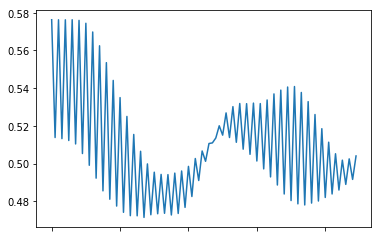

In [26]:
# %matplotlib inline
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

data_variables.mean().plot()

In [6]:
%%R

classes

  [1]  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2
 [26]  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3
 [51]  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4
 [76]  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5
[101]  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6
[126]  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7
[151]  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8
[176]  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9
[201]  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10
[226] 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10


In [7]:
%%R

temp <- lda(V91 ~ . , data=raw.data)
ldax <- predict(temp, raw.variables)$x
head(ldax)

        LD1      LD2      LD3        LD4        LD5        LD6        LD7
1 -6.273981 7.629797 2.410050 2.13702648 -1.6018830 -0.3733624 -0.5947996
2 -5.875809 3.671507 1.620110 0.07174723  1.7909398 -0.1244789  1.1894372
3 -4.828481 6.427672 3.438247 0.96494842 -0.3752380  3.1499868  1.2897261
4 -5.053552 5.997879 1.906111 1.32653098 -0.9846578 -0.7968054  0.1790753
5 -5.582960 6.906384 3.996183 2.43087297 -1.7967292  1.5020463  0.3164474
6 -4.346027 5.761539 2.604704 1.92254394 -0.1842831  0.0700279 -0.3060489
         LD8         LD9
1 -1.4895964  0.70448835
2  2.5562986  1.20790186
3  1.2130131  0.07880931
4 -1.1815785  1.66147516
5 -0.5679575 -1.14227887
6 -1.3623932  0.22773265


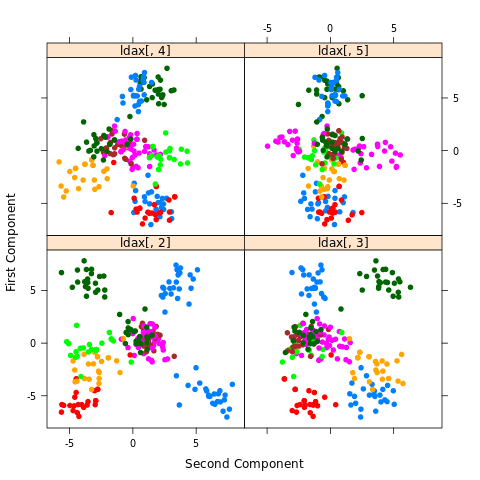

In [8]:
%%R

lda.plot <- xyplot(ldax[, 1] ~ ldax[, 2] + ldax[, 3] + ldax[, 4] + ldax[, 5], groups=classes, pch=19)
lda.plot$ylab <- "First Component"
lda.plot$xlab <- "Second Component"
lda.plot

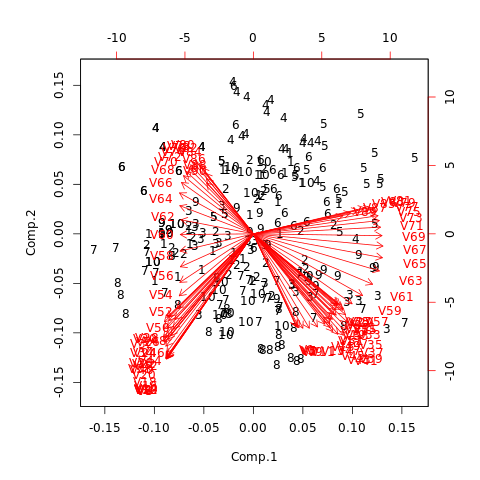

In [27]:
%%R

data.matrix <- as.matrix(raw.variables)
rownames(data.matrix) <- classes
head(data.matrix)
pca <- princomp(data.matrix, cor = TRUE)
biplot(pca)

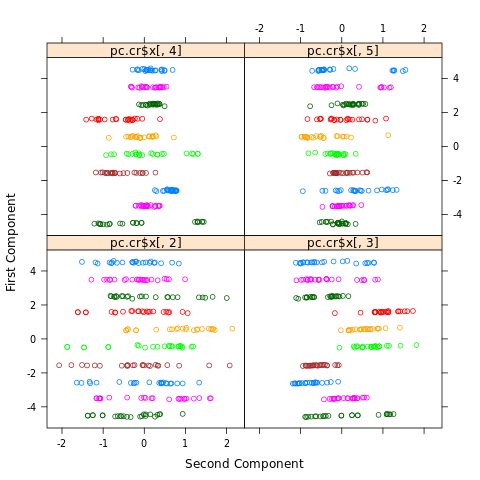

In [11]:
%%R

pc.cr <- prcomp(raw.data)
pca.plot <- xyplot(pc.cr$x[, 1] ~ pc.cr$x[, 2] + pc.cr$x[, 3] + pc.cr$x[, 4] + pc.cr$x[, 5], groups=classes)
pca.plot$ylab <- "First Component"
pca.plot$xlab <- "Second Component"
pca.plot

In [12]:
%%R

library(ggplot2)
## This example uses the ChickWeight dataset, which comes with ggplot2
## First plot
p1 <- ggplot(ChickWeight, aes(x = Time, y = weight, colour = Diet, group = Chick)) +
   geom_line() +
   ggtitle("Growth curve for individual chicks")
## Second plot
p2 <- ggplot(ChickWeight, aes(x = Time, y = weight, colour = Diet)) +
   geom_point(alpha = .3) +
   geom_smooth(alpha = .2, size = 1) +
   ggtitle("Fitted growth curve per diet")
## Third plot
p3 <- ggplot(subset(ChickWeight, Time == 21), aes(x = weight, colour = Diet)) +
   geom_density() +
   ggtitle("Final weight, by diet")
## Fourth plot
p4 <- ggplot(subset(ChickWeight, Time == 21), aes(x = weight, fill = Diet)) +
    geom_histogram(colour = "black", binwidth = 50) +
   facet_grid(Diet ~ .) +
   ggtitle("Final weight, by diet") +
   theme(legend.position = "none")        # No legend (redundant in this graph)
## Combine plots and display
multiplot(p1, p2, p3, p4, cols = 2)


Error in multiplot(p1, p2, p3, p4, cols = 2) : 
  could not find function "multiplot"


/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in multiplot(p1, p2, p3, p4, cols = 2) : 
  could not find function "multiplot"

  warnings.warn(x, RRuntimeWarning)


In [13]:
%%R

# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning:
  warnings.warn(x, RRuntimeWarning)
/home/pankracy/.virtualenvs/testenv3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  Ignoring unknown aesthetics: y

  warnings.warn(x, RRuntimeWarning)


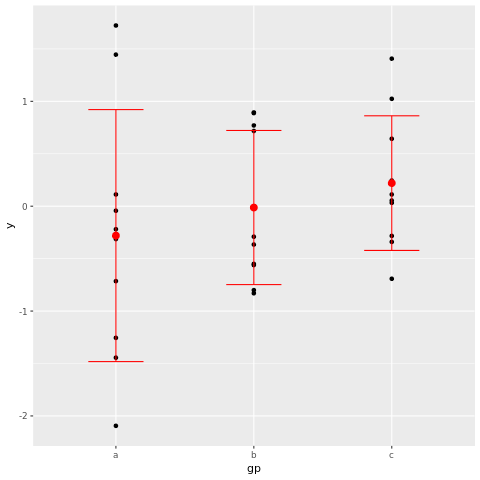

In [14]:
%%R

df <- data.frame(gp = factor(rep(letters[1:3], each = 10)),
                 y = rnorm(30))
# Compute sample mean and standard deviation in each group
library(plyr)
ds <- ddply(df, .(gp), summarise, mean = mean(y), sd = sd(y))

# Declare the data frame and common aesthetics.
# The summary data frame ds is used to plot
# larger red points in a second geom_point() layer.
# If the data = argument is not specified, it uses the
# declared data frame from ggplot(); ditto for the aesthetics.
ggplot(df, aes(x = gp, y = y)) +
   geom_point() +
   geom_point(data = ds, aes(y = mean),
              colour = 'red', size = 3)
# Same plot as above, declaring only the data frame in ggplot().
# Note how the x and y aesthetics must now be declared in
# each geom_point() layer.
ggplot(df) +
   geom_point(aes(x = gp, y = y)) +
   geom_point(data = ds, aes(x = gp, y = mean),
                 colour = 'red', size = 3)
# Set up a skeleton ggplot object and add layers:
ggplot() +
  geom_point(data = df, aes(x = gp, y = y)) +
  geom_point(data = ds, aes(x = gp, y = mean),
                        colour = 'red', size = 3) +
  geom_errorbar(data = ds, aes(x = gp, y = mean,
                    ymin = mean - sd, ymax = mean + sd),
                    colour = 'red', width = 0.4)

In [15]:
# %%R

# GetNewTrain <- function(training.indexes, classes, clusters.num, verbose) {
#   d <- dist(raw.data, method = "euclidean")
#   fit <- hclust(d, method="ward") 
#   groups <- cutree(fit, k=clusters.num)
#   if (verbose == TRUE) {
#     plot(fit)
#     rect.hclust(fit, k=clusters.num, border="red")
#   }

#   for (i in 1:clusters.num) {
#     cluster <- as.integer(names(groups[groups == i]))
#     cluster.train.subset <- cluster[cluster %in% training.indexes]
#     if (length(cluster.train.subset) != 0) {
#       leader <- classes[cluster.train.subset][1]
#       if (all(classes[cluster.train.subset] == leader) ) {
#         newItems <- cluster[!cluster %in% cluster.train.subset]
#         if (length(newItems) != 0) {
#           training.indexes <- c(training.indexes, newItems)
#           classes[newItems] <- leader
#           if ( verbose == TRUE) {
#             cat("added items", newItems, "cluster:", cluster, "cluster.train.subset:", cluster.train.subset, "to class", leader, "\n")
#           }
#         }
#       }
#     }
#   }
#   return (list("training.indexes" = training.indexes, "classes" = classes))
# }

# GetResults <- function(raw, raw.data, classes, training.indexes, clusters.num, max.pca.dim, verbose) {
#   filter <- ksvm(V91~.,
#                  data=raw[training.indexes,],
#                  kernel="laplacedot",
#                  kpar=list(sigma=0.05),
#                  C=5,
#                  cross=3)
#   result1 <- predict(filter, raw[-training.indexes,-91])
#   table1 <- table(round(result1), raw[-training.indexes,91])

#   pc <- prcomp(raw.data)
#   pc$x
#   transformed <- as.matrix(pc$x[,1:max.pca.dim])
#   transformed <- cbind(classes, transformed)

#   new.train <- GetNewTrain(training.indexes, classes, clusters.num, verbose)
#   train.diff <- new.train$training.indexes[! new.train$training.indexes %in% training.indexes]

#   filter <- ksvm(classes~.,
#                  data=transformed[new.train$training.indexes,],
#                  kernel="laplacedot",
#                  kpar=list(sigma=0.05),
#                  C=5,
#                  cross=3)
#   print("PO")
#   ### Następna linijka psuje
#   result2 <- predict(filter,
#                      as.matrix(transformed[-new.train$training.indexes,-1]))
#   print("PO4")
#   table2 <- table(c(round(result2), new.train$classes[train.diff]),
#                   c(transformed[-new.train$training.indexes,1], classes[train.diff]))

#   print("PO2")
#   return (c(sum(diag(table1))/sum(table1), sum(diag(table2))/sum(table2)))
# }

# repetitions.number = 10
# results <- matrix(ncol=2, nrow=0)
# results.labels <- c()
# for (train.ratio in seq(0.2, 0.6, by = 0.1)) {
#   samples = c(0, 0)
#   for (j in 1:repetitions.number) {
#     training.indexes <- vector()
#     for (i in 1:classes.dim) {
#       classes.indexes <- rownames(raw.data[raw.data[,91] == i,])
#       training.indexes <- as.integer(c(training.indexes, sample(classes.indexes, round(length(classes.indexes) * train.ratio))))
#     }
#     samples <- samples + GetResults(raw.data, raw.variables, classes, training.indexes, clusters.num, pca.dim, FALSE)
#   }
#   results <- rbind(results, samples / repetitions.number, deparse.level = 0)
#   results.labels <- c(results.labels, sprintf("%s%%", train.ratio*100))
#   print(results)
# }

# plot(results[,1], type="o", col="blue", ylim=c(0,1), xlab="Training set ratio", ylab="Accuracy", xaxt="n")
# points(results[,2], type="o", col="red")
# axis(1, at=1:5, labels=results.labels)

In [57]:
%%R

GetNewTrain <- function(training.indexes, training.classes, clusters.num, verbose) { 
  d <- dist(raw.variables, method = "euclidean")
  fit <- hclust(d, method="ward") 
  groups <- cutree(fit, k=clusters.num)
  if (verbose == TRUE) {
    plot(fit)
    rect.hclust(fit, k=clusters.num, border="red")
  }
    
  for (i in 1:clusters.num) {
    cluster <- as.integer(names(groups[groups == i]))
    cluster.train.subset <- cluster[cluster %in% training.indexes]
    cluster.train.subset <- cluster.train.subset[which(!is.na(cluster.train.subset))]
    if (length(cluster.train.subset) > 0) {
      leader <- classes[cluster.train.subset][1]
      if (!is.na(leader) && all(classes[cluster.train.subset] == leader) ) {
        cluster.not.in.train.subset <- cluster[!cluster %in% cluster.train.subset]
        if (length(cluster.not.in.train.subset) > 0) {
          training.indexes <- c(training.indexes, cluster.not.in.train.subset)
          training.classes[cluster.not.in.train.subset] <- leader
          if ( verbose == TRUE) {
            cat("added items", cluster.not.in.train.subset,
                "cluster:", cluster,
                "cluster.train.subset:", cluster.train.subset,
                "to class", leader, "\n")
          }
        }
      }
    }
  }
  return (list("training.indexes" = training.indexes, "classes" = training.classes))
}

CalculateKSVMPrecision <- function(filter, training.indexes, raw.data) {
  predicted <- predict(filter,
                       raw.data[-training.indexes,-91])
  table.predicted.expected <- table(factor(round(predicted), levels = 1:10),
                                    factor(raw.data[-training.indexes,91], levels = 1:10))
  return (sum(diag(table.predicted.expected)) / sum(table.predicted.expected))
}

GetResults <- function(raw.data, raw.variables, classes, training.indexes, clusters.num, max.pca.dim, verbose) {
  supervised.ksvm <- ksvm(V91~.,
                          data=raw.data[training.indexes,],
                          kernel="laplacedot",
                          kpar=list(sigma=0.05),
                          C=5,
                          cross=3)
  
  training.classes <- classes
  training.classes[which((!seq(1, length(classes)) %in% training.indexes) == TRUE)] = NA
  new.train <- GetNewTrain(training.indexes, training.classes, clusters.num, verbose)
#   train.diff <- new.train$training.indexes[!new.train$training.indexes %in% training.indexes]

  semi.supervised.ksvm <- ksvm(x = as.matrix(raw.variables[new.train$training.indexes,]),
                               y = new.train$classes[new.train$training.indexes],
                               kernel="laplacedot",
                               kpar=list(sigma=0.05),
                               C=5,
                               cross=3)
  return (c(CalculateKSVMPrecision(supervised.ksvm, training.indexes, raw.data),
            CalculateKSVMPrecision(semi.supervised.ksvm, training.indexes, raw.data)))
}

In [58]:
%%R

sum(1,2,3)

[1] 6


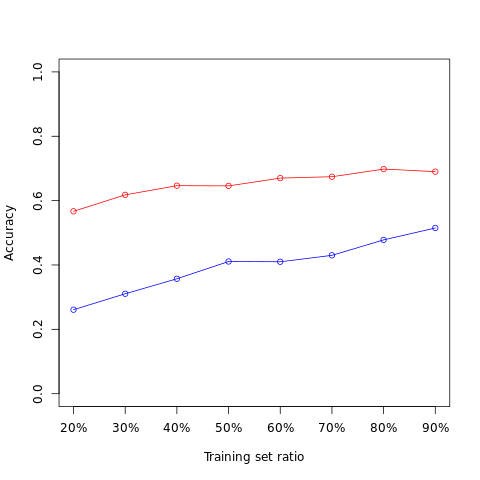

In [59]:
%%R

repetitions.number = 10
results <- matrix(ncol=2, nrow=0)
results.labels <- c()
for (train.ratio in seq(0.2, 0.9, by = 0.1)) {
  samples = c(0, 0)
  for (j in 1:repetitions.number) {
    training.indexes <- vector()
    for (i in 1:classes.dim) {
      classes.indexes <- rownames(raw.data[raw.data[,91] == i,])
      training.indexes <- as.integer(c(training.indexes, sample(classes.indexes, round(length(classes.indexes) * train.ratio))))
    }
    samples <- samples + GetResults(raw.data, raw.variables, classes, training.indexes, clusters.num, pca.dim, FALSE)
  }
  results <- rbind(results, samples / repetitions.number, deparse.level = 0)
  results.labels <- c(results.labels, sprintf("%s%%", train.ratio*100))
#   print(results)
}

plot(results[,1], type="o", col="blue", ylim=c(0,1), xlab="Training set ratio", ylab="Accuracy", xaxt="n")
points(results[,2], type="o", col="red")
axis(1, at=1:8, labels=results.labels)